### 任务描述

理解K-Means的算法原理，使用K-Means算法实现聚类。

### 相关知识

**处理数据**

In [8]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs


def create_self_build_data():
    x, y = make_blobs(n_samples=1000, n_features=2, centers=[[-1, 0], [0, 1], [1, 0], [0, -1]],
                      cluster_std=[0.4, 0.2, 0.2, 0.2], random_state=4426)
    plt.figure()
    plt.scatter(x[:, 0], x[:, 1])
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Build Data Visualization')
    plt.savefig("Build Data Visualization.jpg")
    plt.show()
    return x


**构建K-Means算法**

1.参数初始化

在K-means算法中，需要初始化的参数只有类簇中心的个数，我们使用类的形式书写代码，所以将初始化部分封装在init函数中，代码如下：

In [9]:
    def __init__(self, n_clusters):
        self.n_clusters = n_clusters

2.计算类簇中心

首先需要随机初始化类簇中心，再计算每个样本点到初始化类簇中心的距离，选择距离最短的类簇中心作为该样本点的类簇，然后通过计算属于该类的样本点的平均值，选出新的样本中心，通过不停的迭代更新类簇中心，最后当满足条件时，停止跌代，返回最终的类簇中心的坐标。这里计算样本点到类簇中心的欧式距离使用cdist函数，该函数已在KNN章节中的实践部分详细讨论过，这里不再讨论。当计算出每个样本点与类簇中心的距离后，使用numpy的argmin函数返回每个样本与相距最短距离的类簇中心的索引值，这样就可以得到每轮迭代中样本点属于的类簇中心的索引。通过求每一个类簇中心的样本点平均值，得到新一轮的类簇中心，具体代码如下：

In [13]:
import numpy as np
from scipy.spatial.distance import cdist

class KMeans(object):

    def __init__(self, n_clusters):
        self.n_clusters = n_clusters

    def fit(self, X, iter_max=100):
        I = np.eye(self.n_clusters)
        centers = X[np.random.choice(len(X), self.n_clusters, replace=False)]
        for _ in range(iter_max):
            prev_centers = np.copy(centers)
            D = cdist(X, centers)
            cluster_index_num = np.argmin(D, axis=1)
            cluster_index = I[cluster_index_num]
            centers = np.sum(X[:, None, :] * cluster_index[:, :, None], axis=0) / np.sum(cluster_index, axis=0)[:, None]
            if np.allclose(prev_centers, centers):
                break
        self.centers = centers
        return centers

    def predict(self, X):
        D = cdist(X, self.centers)
        return np.argmin(D, axis=1)

在上面代码中fit是封装计算类簇中心的函数，传入的参数分别是X和iter_max，X代表的是存储数据的数组，即上方加载mnist数据的data参数，而iter_max参数代表迭代的最高次数，但是不一定需要进行iter_max次计算，当满足条件时候，循环就会停止。这里的条件是当新一轮更新的类簇中心的坐标与上一轮类簇中心的坐标完全一致时，迭代结束。

3.对样本进行类簇中心的归类

该函数对传入的数据与最后得出的类簇中心进行欧式距离，而后通过argmin函数返回每个样本点所属于的索引，具体代码如下：

In [14]:
def predict(self, X):
    D = cdist(X, self.centers)
    return np.argmin(D, axis=1)

**实验结果**

在该部分中，通过调用K-means类对创建的数据库进行聚类，并且通过使用不同的K值，使用SC轮廓系数评估其聚类结果。并可视化其聚类结果及不同的K值下评分的曲线图，具体代码如下：

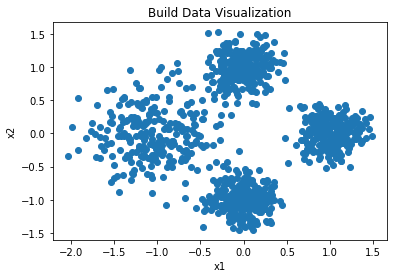

In [20]:
from sklearn.metrics import silhouette_score



def visualize(x, centers, res, i):
    if i == 1:
        plt.figure(figsize=(20, 10))
    plt.subplot(3, 4, i)
    plt.scatter(x[:, 0], x[:, 1], c=res)
    plt.scatter(centers[:, 0], centers[:, 1], c='red', s=50)
    plt.title('Kmeans for Building Data(k={})'.format(i))
    if i == 12:
        plt.savefig('Kmeans for Building_data.jpg')
        plt.show()


if __name__ == '__main__':
    data = create_self_build_data()
    score = [0]
    x = []

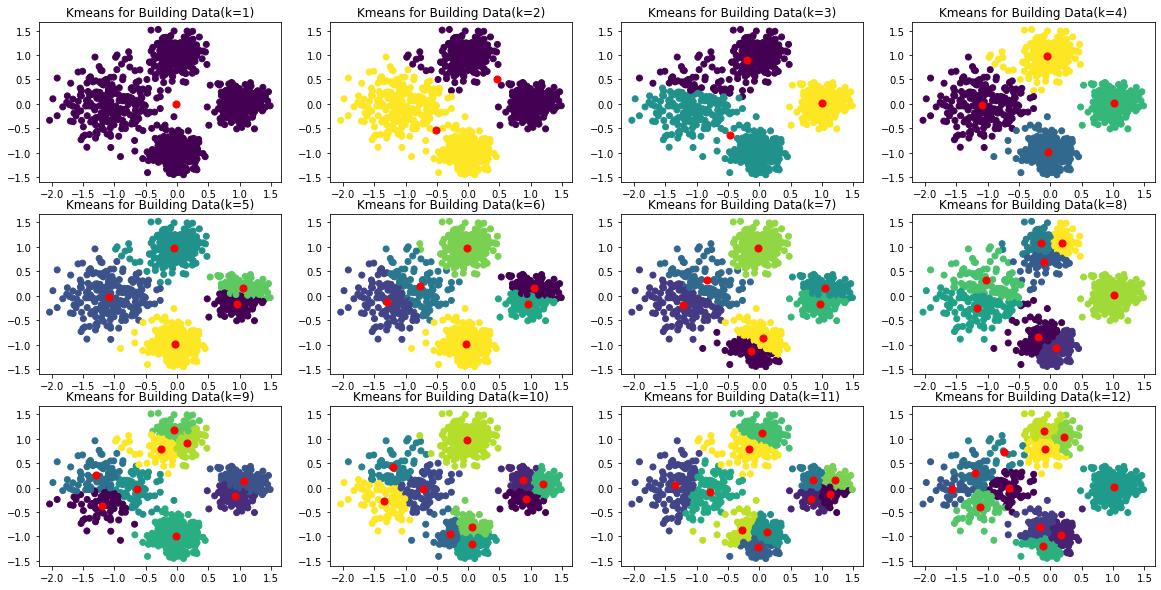

In [19]:
for i in range(1, 13):
        k = KMeans(i)
        centers = k.fit(data)
        res = k.predict(data)
        if not i == 1:
            score.append(silhouette_score(data, res))
        visualize(data, centers, res, i)
        x.append(i)

[0, 0.457780803218996, 0.5080853141953842, 0.39634947012079635, 0.6100448696329013, 0.5084791924602585, 0.40910112529296017, 0.5225053168848888, 0.4106956314861176, 0.419259446098832, 0.4046020534532498, 0.40255519984926974]


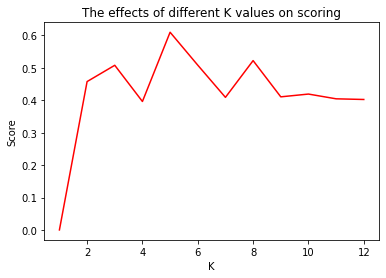

In [17]:
print(score)
plt.figure()
plt.xlabel("K")
plt.ylabel("Score")
plt.title("The effects of different K values on scoring")
plt.plot(x, score, c='r')

### 编程要求

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import cdist
from sklearn.datasets.samples_generator import make_blobs
from sklearn.metrics import silhouette_score


def create_self_build_data():
    x, y = make_blobs(n_samples=1000, n_features=2, centers=[[-1, 0], [0, 1], [1, 0], [0, -1]],
                      cluster_std=[0.4, 0.2, 0.2, 0.2], random_state=4426)
    plt.figure()
    plt.scatter(x[:, 0], x[:, 1])
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Build Data Visualization')
    plt.savefig("Build Data Visualization.jpg")
    plt.show()
    return x


class KMeans(object):

    def __init__(self, n_clusters):
        self.n_clusters = n_clusters

    def fit(self, X, iter_max=100):
        ******Begin******
        
        
        ******End********

    def predict(self, X):
        D = cdist(X, self.centers)
        return np.argmin(D, axis=1)


def visualize(x, centers, res, i):
    if i == 1:
        plt.figure(figsize=(20, 10))
    plt.subplot(3, 4, i)
    plt.scatter(x[:, 0], x[:, 1], c=res)
    plt.scatter(centers[:, 0], centers[:, 1], c='red', s=50)
    plt.title('Kmeans for Building Data(k={})'.format(i))
    if i == 12:
        plt.savefig('Kmeans for Building_data.jpg')
        plt.show()


if __name__ == '__main__':
    data = create_self_build_data()
    score = [0]
    x = []
    for i in range(1, 13):
        k = KMeans(i)
        centers = k.fit(data)
        res = k.predict(data)
        if not i == 1:
            score.append(silhouette_score(data, res))
        visualize(data, centers, res, i)
        x.append(i)
    print(score)
    plt.figure()
    plt.xlabel("K")
    plt.ylabel("Score")
    plt.title("The effects of different K values on scoring")
    plt.plot(x, score, c='r')

### 参考答案

In [ ]:
def fit(self, X, iter_max=100):
        I = np.eye(self.n_clusters)
        centers = X[np.random.choice(len(X), self.n_clusters, replace=False)]
        for _ in range(iter_max):
            prev_centers = np.copy(centers)
            D = cdist(X, centers)
            cluster_index_num = np.argmin(D, axis=1)
            cluster_index = I[cluster_index_num]
            centers = np.sum(X[:, None, :] * cluster_index[:, :, None], axis=0) / np.sum(cluster_index, axis=0)[:, None]
            if np.allclose(prev_centers, centers):
                break
        self.centers = centers
        return centers